In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

raw_data = pd.read_csv("C:/Users/Arnaud/Desktop/TSIA208/TP 1/invest.csv") #,quotechar='"',delimiter=";"
pd.set_option('display.max_columns', 10)

# Number of rows and columns in the dataset
n_r, n_c = raw_data.shape 

# Names of the columns
c_names = [elem for elem in raw_data.columns] 
categories = c_names[0].split(";")
print(categories) #['year', 'gnp', 'invest', 'cpi', 'interest']

raw_data = raw_data[c_names[0]].tolist() # Converting everything in a list

data = dict()
for category in categories:
    L = []
    for elem in raw_data :
        L.append(eval(elem.split(";")[categories.index(category)]))
    data[category] = L
print(data)

['year', 'gnp', 'invest', 'cpi', 'interest']
{'year': [1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982], 'gnp': [873.4, 944, 992.7, 1077.6, 1185.9, 1326.4, 1434.2, 1549.2, 1718, 1918.3, 2163.9, 2417.8, 2633.1, 2937.7, 3057.5], 'invest': [133.3, 149.3, 144.2, 166.4, 195, 229.8, 228.7, 206.1, 257.9, 324.1, 386.6, 423, 402.3, 471.5, 421.9], 'cpi': [82.54, 86.79, 91.45, 96.01, 100, 105.75, 115.08, 125.79, 132.34, 140.05, 150.42, 163.42, 178.64, 195.51, 207.23], 'interest': [5.16, 5.87, 5.95, 4.88, 4.5, 6.44, 7.83, 6.25, 5.5, 5.46, 7.46, 10.28, 11.77, 13.42, 11.02]}


Text(0, 0.5, 'Investment')

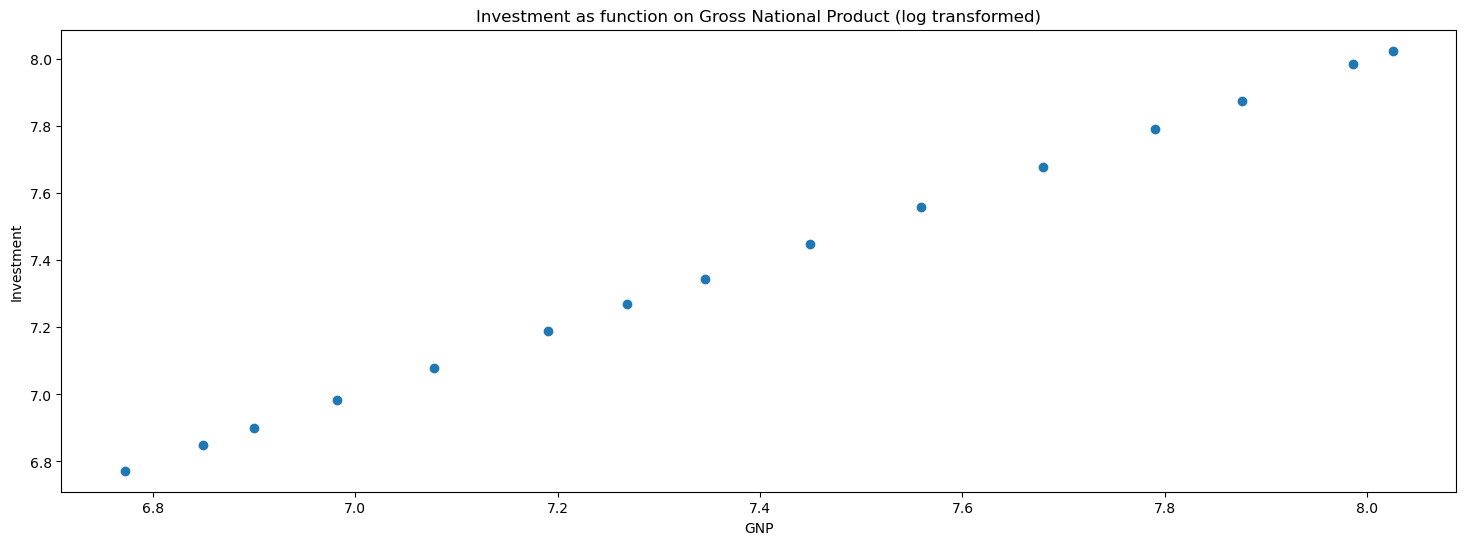

In [40]:
# Question 2 :

x = list(np.log(np.array(data['gnp'])))
y = list(np.log(np.array(data['gnp'])))

plt.figure(figsize=(18,6))
plt.scatter(x,y)
plt.title('Investment as function on Gross National Product (log transformed)')
plt.xlabel('GNP')
plt.ylabel('Investment')

In [41]:
# Question 3 :

n = 15
x_mean = sum(x)/n
y_mean = sum(y)/n

slope = 0
coeff = 0
for i in range(n):
    slope += (x[i]-x_mean)*(y[i]-y_mean)
    coeff += (x[i]-x_mean)**2
slope /= coeff

intercept = y_mean - slope*x_mean

print(f"Slope : {round(slope,3)}")
print(f"Intercept : {round(intercept,3)}")

sigma_square_unbiased_estimator = 0
for i in range(n):
    sigma_square_unbiased_estimator += (y[i]-(intercept+slope*x[i]))**2
sigma_square_unbiased_estimator /= (n-2)

print(f"Unbiased estimator for sigma squared : {round(sigma_square_unbiased_estimator,3)}")

slope_variance = sigma_square_unbiased_estimator*(1/n + x_mean**2/coeff)
intercept_variance = sigma_square_unbiased_estimator/coeff

print(f"Slope variance : {round(slope_variance,3)}")
print(f"Intercept variance : {round(intercept_variance,3)}")


Slope : 1.0
Intercept : 0.0
Unbiased estimator for sigma squared : 0.0
Slope variance : 0.0
Intercept variance : 0.0
